In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

data = pd.read_csv('../data/train.csv')
#print(diabetes_data['가격'].value_counts())
data.head(3)

,ID,생산년도,모델출시년도,브랜드,차량모델명,판매도시,판매구역,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG),가격
0,TRAIN_00000,2018,2014,skoda,fabia,KAT,SLA,85231,999,0,0,1,0,0,51.74
1,TRAIN_00001,2010,2006,toyota,auris,RKO,SWI,135000,1598,0,0,1,0,0,41.47
2,TRAIN_00002,2002,2002,mercedes-benz,clk-klasa,GNI,WIE,255223,1796,0,0,1,0,0,17.81


In [12]:
data.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57920 entries, 0 to 57919
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           57920 non-null  object 
 1   생산년도         57920 non-null  int64  
 2   모델출시년도       57920 non-null  int64  
 3   브랜드          57920 non-null  object 
 4   차량모델명        57920 non-null  object 
 5   판매도시         57920 non-null  object 
 6   판매구역         57920 non-null  object 
 7   주행거리         57920 non-null  int64  
 8   배기량          57920 non-null  int64  
 9   압축천연가스(CNG)  57920 non-null  int64  
 10  경유           57920 non-null  int64  
 11  가솔린          57920 non-null  int64  
 12  하이브리드        57920 non-null  int64  
 13  액화석유가스(LPG)  57920 non-null  int64  
 14  가격           57920 non-null  float64
dtypes: float64(1), int64(9), object(5)
memory usage: 6.6+ MB


전처리 _ 결측치 확인

In [3]:
# Nan 확인
data.isna().sum()

ID             0
생산년도           0
모델출시년도         0
브랜드            0
차량모델명          0
판매도시           0
판매구역           0
주행거리           0
배기량            0
압축천연가스(CNG)    0
경유             0
가솔린            0
하이브리드          0
액화석유가스(LPG)    0
가격             0
dtype: int64

In [26]:
# KOR -> ENG
def columns_toENG(Data):
    
    Data = Data.rename(columns={'생산년도':'Year_prd','모델출시년도':'Year_model','브랜드':'Brand','차량모델명':'Model','판매도시':'City','판매구역':'Area'})
    Data = Data.rename(columns={'주행거리':'Mileage','배기량':'CC','압축천연가스(CNG)':'Fuel_CNG','경유':'Fuel_Diesel','가솔린':'Fuel_Gasoline','하이브리드':'Fuel_Hybrid','액화석유가스(LPG)':'Fuel_LPG','가격':'Price'})

    return Data

df = columns_toENG(data)
df

,ID,Year_prd,Year_model,Brand,Model,City,Area,Mileage,CC,Fuel_CNG,Fuel_Diesel,Fuel_Gasoline,Fuel_Hybrid,Fuel_LPG,Price
0,TRAIN_00000,2018,2014,skoda,fabia,KAT,SLA,85231,999,0,0,1,0,0,51.74
1,TRAIN_00001,2010,2006,toyota,auris,RKO,SWI,135000,1598,0,0,1,0,0,41.47
2,TRAIN_00002,2002,2002,mercedes-benz,clk-klasa,GNI,WIE,255223,1796,0,0,1,0,0,17.81
3,TRAIN_00003,2006,2001,nissan,x-trail,EHX,WIE,238000,2184,0,1,0,0,0,18.20
4,TRAIN_00004,2007,2007,fiat,bravo,OSW,MAL,251000,1910,0,1,0,0,0,17.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57915,TRAIN_57915,2017,2011,mercedes-benz,b-klasa,POZ,WIE,64839,1461,0,1,0,0,0,116.87
57916,TRAIN_57916,2006,2005,opel,zafira,XOK,ZAC,299850,1796,0,0,1,0,0,15.47
57917,TRAIN_57917,2013,2003,fiat,punto,CIE,MAZ,112000,1368,0,0,1,0,0,21.97
57918,TRAIN_57918,2006,2004,opel,astra,ZRI,DOL,189321,1598,0,0,1,0,0,16.77


전처리 _ 중고차 분리

In [9]:
# 주행거리가 200km 미만인 데이터 갯수 : 1221개
len(df[df['Mileage']<200])

1221

In [27]:
# Criteria : 중고차 최소 km 기준

def drop_newCar(Data,Criteria):

    print("Before Datasets size : ", len(Data))
    newCar_idx = Data[Data['Mileage']<Criteria].index
    Data = Data.drop(index = newCar_idx)
    print("Delete Datasets size : ",len(newCar_idx))
    print("After Datasets size : ", len(Data))

    return Data

df = drop_newCar(df,200)
df

Before Datasets size :  57920
Delete Datasets size :  1221
After Datasets size :  56699


,ID,Year_prd,Year_model,Brand,Model,City,Area,Mileage,CC,Fuel_CNG,Fuel_Diesel,Fuel_Gasoline,Fuel_Hybrid,Fuel_LPG,Price
0,TRAIN_00000,2018,2014,skoda,fabia,KAT,SLA,85231,999,0,0,1,0,0,51.74
1,TRAIN_00001,2010,2006,toyota,auris,RKO,SWI,135000,1598,0,0,1,0,0,41.47
2,TRAIN_00002,2002,2002,mercedes-benz,clk-klasa,GNI,WIE,255223,1796,0,0,1,0,0,17.81
3,TRAIN_00003,2006,2001,nissan,x-trail,EHX,WIE,238000,2184,0,1,0,0,0,18.20
4,TRAIN_00004,2007,2007,fiat,bravo,OSW,MAL,251000,1910,0,1,0,0,0,17.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57915,TRAIN_57915,2017,2011,mercedes-benz,b-klasa,POZ,WIE,64839,1461,0,1,0,0,0,116.87
57916,TRAIN_57916,2006,2005,opel,zafira,XOK,ZAC,299850,1796,0,0,1,0,0,15.47
57917,TRAIN_57917,2013,2003,fiat,punto,CIE,MAZ,112000,1368,0,0,1,0,0,21.97
57918,TRAIN_57918,2006,2004,opel,astra,ZRI,DOL,189321,1598,0,0,1,0,0,16.77


주행거리 이상치

In [28]:
# 주행거리가 2500000인 것은 이상치라고 판단하여 제거함
df = df[df['Mileage'] != df['Mileage'].max()]

In [13]:
df['Mileage'].describe()

count     56698.000000
mean     171442.912960
std       79714.557265
min         200.000000
25%      116287.000000
50%      173000.000000
75%      221000.000000
max      900000.000000
Name: Mileage, dtype: float64

In [14]:
df['Mileage'].quantile(0.02), df['Mileage'].quantile(0.025)

(20987.04, 24680.200000000004)

전처리 _ 문자 -> 숫자 (Brand, Model, City, Area)

In [29]:
#xData_ = pd.get_dummies(xData)

# xData['Brand'] = xData['Brand'].astype('category')
# pd.get_dummies(xData['Brand'])

# Label Encoder
from sklearn.preprocessing import LabelEncoder

label_col = ['Brand','Model','City','Area']

for i in label_col:
    item_label = df[i]
    #print(item_label)
    encoder = LabelEncoder()
    encoder.fit(item_label)
    df[i] = encoder.transform(item_label)

# One-Hot Encoder
# from sklearn.preprocessing import OneHotEncoder

# label_col = ['Brand','Model','City','Area']

# for i in label_col:
#     items = xData[i]

#     oh_encoder=OneHotEncoder()
#     oh_encoder.fit(items)
#     oh_encoder.categories_
#     oh_labels = oh_encoder.transform(items)
#     arrayData = oh_labels.toarray()
#     xData[i] = arrayData

df

C:\Users\user\AppData\Local\Temp\ipykernel_16332\2167155883.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = encoder.transform(item_label)
C:\Users\user\AppData\Local\Temp\ipykernel_16332\2167155883.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = encoder.transform(item_label)
C:\Users\user\AppData\Local\Temp\ipykernel_16332\2167155883.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

,ID,Year_prd,Year_model,Brand,Model,City,Area,Mileage,CC,Fuel_CNG,Fuel_Diesel,Fuel_Gasoline,Fuel_Hybrid,Fuel_LPG,Price
0,TRAIN_00000,2018,2014,16,47,1214,12,85231,999,0,0,1,0,0,51.74
1,TRAIN_00001,2010,2006,17,20,2137,13,135000,1598,0,0,1,0,0,41.47
2,TRAIN_00002,2002,2002,9,36,785,15,255223,1796,0,0,1,0,0,17.81
3,TRAIN_00003,2006,2001,11,133,546,15,238000,2184,0,1,0,0,0,18.20
4,TRAIN_00004,2007,2007,3,25,1839,5,251000,1910,0,1,0,0,0,17.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57915,TRAIN_57915,2017,2011,9,23,1957,15,64839,1461,0,1,0,0,0,116.87
57916,TRAIN_57916,2006,2005,12,142,2941,16,299850,1796,0,0,1,0,0,15.47
57917,TRAIN_57917,2013,2003,3,90,287,6,112000,1368,0,0,1,0,0,21.97
57918,TRAIN_57918,2006,2004,12,19,3174,0,189321,1598,0,0,1,0,0,16.77


전처리 _ 상관계수

In [16]:
# 숫자 항 만 상관계수 작성
def myCorr(data):

    corrList=[]
    tmp = data.dtypes
    findtype = ['int32','int64','float32', 'float64']
    for index,val in zip(tmp.index, tmp.values):
        if val in findtype:
            corrList.append(index)

    corrData = data[corrList].corr()

    print(corrData)
    
    # 시각화
    import seaborn as sns

    corrData.to_csv('corr.csv')

    figure = plt.figure(figsize=(15,15),facecolor='white')
    sns.heatmap(corrData, annot=True, cmap='Blues')

    #그림 파일 세이브
    figure.savefig('corr00.png')


               Year_prd  Year_model     Brand     Model      City      Area  \
Year_prd       1.000000    0.895096  0.157869  0.043803  0.008692  0.004454   
Year_model     0.895096    1.000000  0.137102  0.030631  0.009818  0.003001   
Brand          0.157869    0.137102  1.000000  0.180742 -0.004036  0.000247   
Model          0.043803    0.030631  0.180742  1.000000  0.000706 -0.003019   
City           0.008692    0.009818 -0.004036  0.000706  1.000000 -0.057444   
Area           0.004454    0.003001  0.000247 -0.003019 -0.057444  1.000000   
Mileage       -0.606174   -0.550889 -0.162317  0.004810 -0.008575 -0.010736   
CC            -0.287770   -0.263283 -0.273215  0.096608  0.013383 -0.013680   
Fuel_CNG       0.000937   -0.000615  0.004864  0.013079  0.003794  0.003988   
Fuel_Diesel    0.096499    0.082749 -0.074651  0.080428  0.002456  0.016361   
Fuel_Gasoline -0.064574   -0.054220  0.060251 -0.074941 -0.002373 -0.003029   
Fuel_Hybrid    0.099534    0.101910  0.088149 -0.008

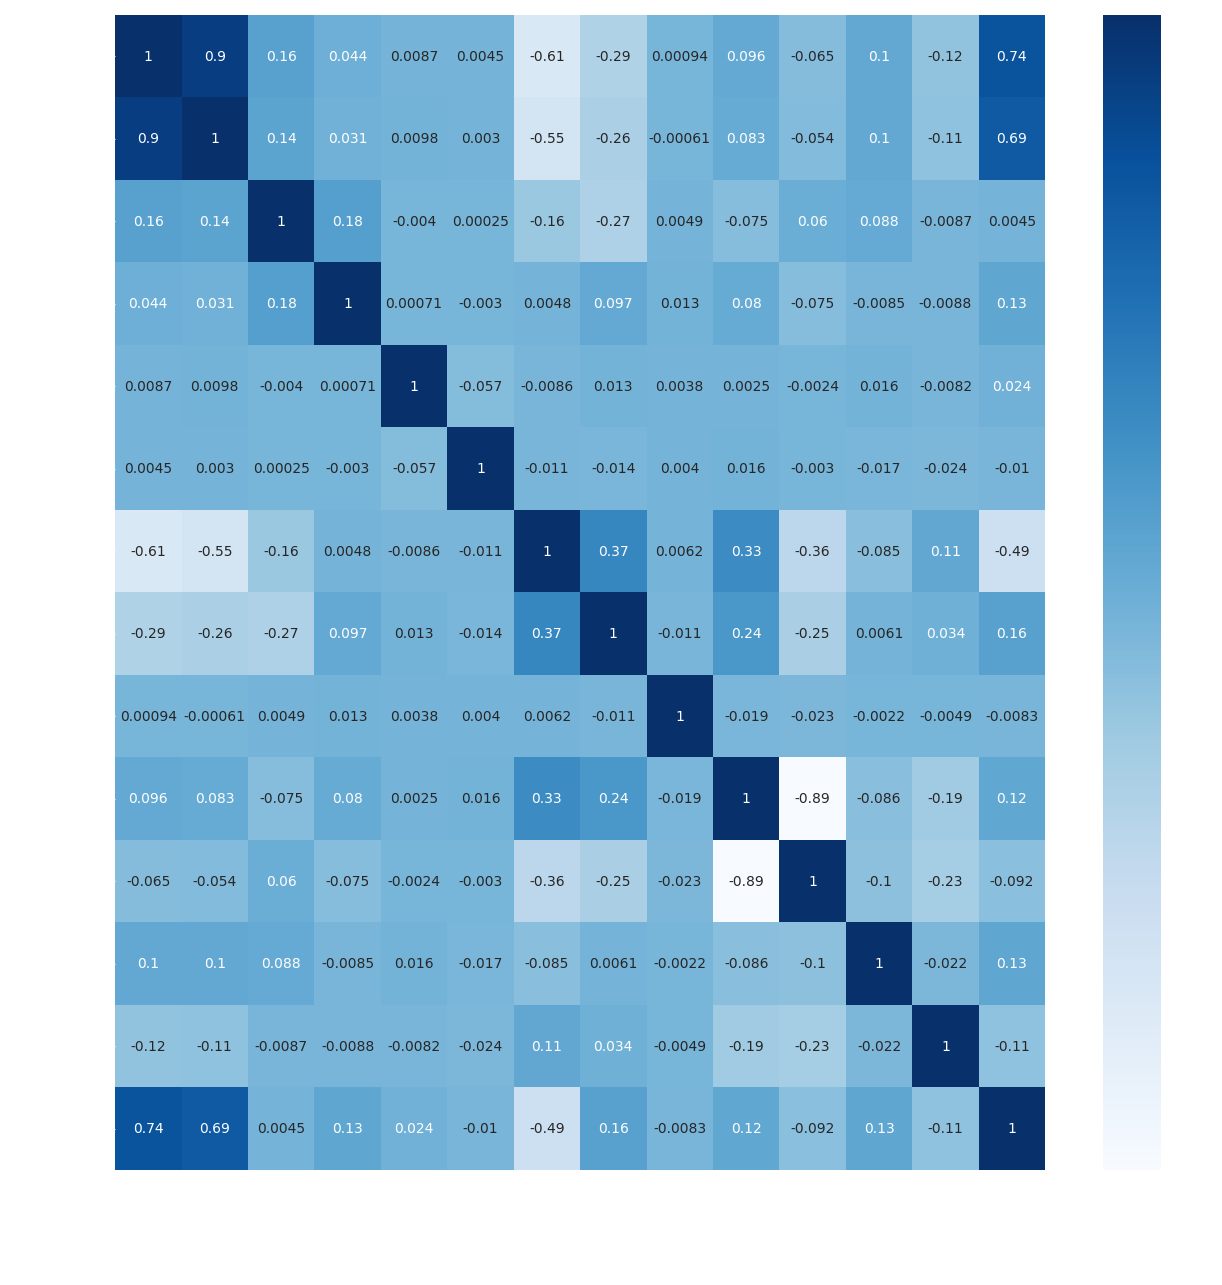

In [18]:
myCorr(df)

전처리 _ 산점도

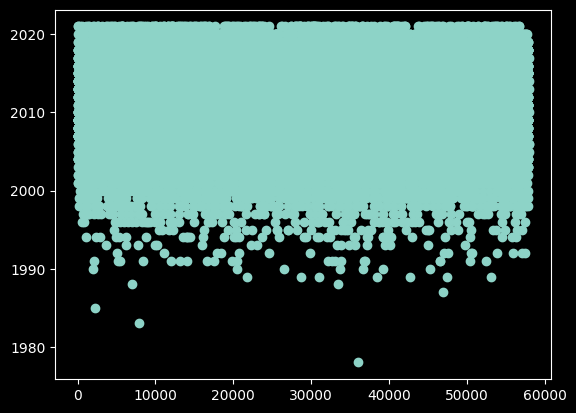

In [33]:
plt.scatter(df.index, df)

['ID', 'Year_prd', 'Year_model', 'Brand', 'Model', 'City', 'Area', 'Mileage', 'CC', 'Fuel_CNG', 'Fuel_Diesel', 'Fuel_Gasoline', 'Fuel_Hybrid', 'Fuel_LPG', 'Price']


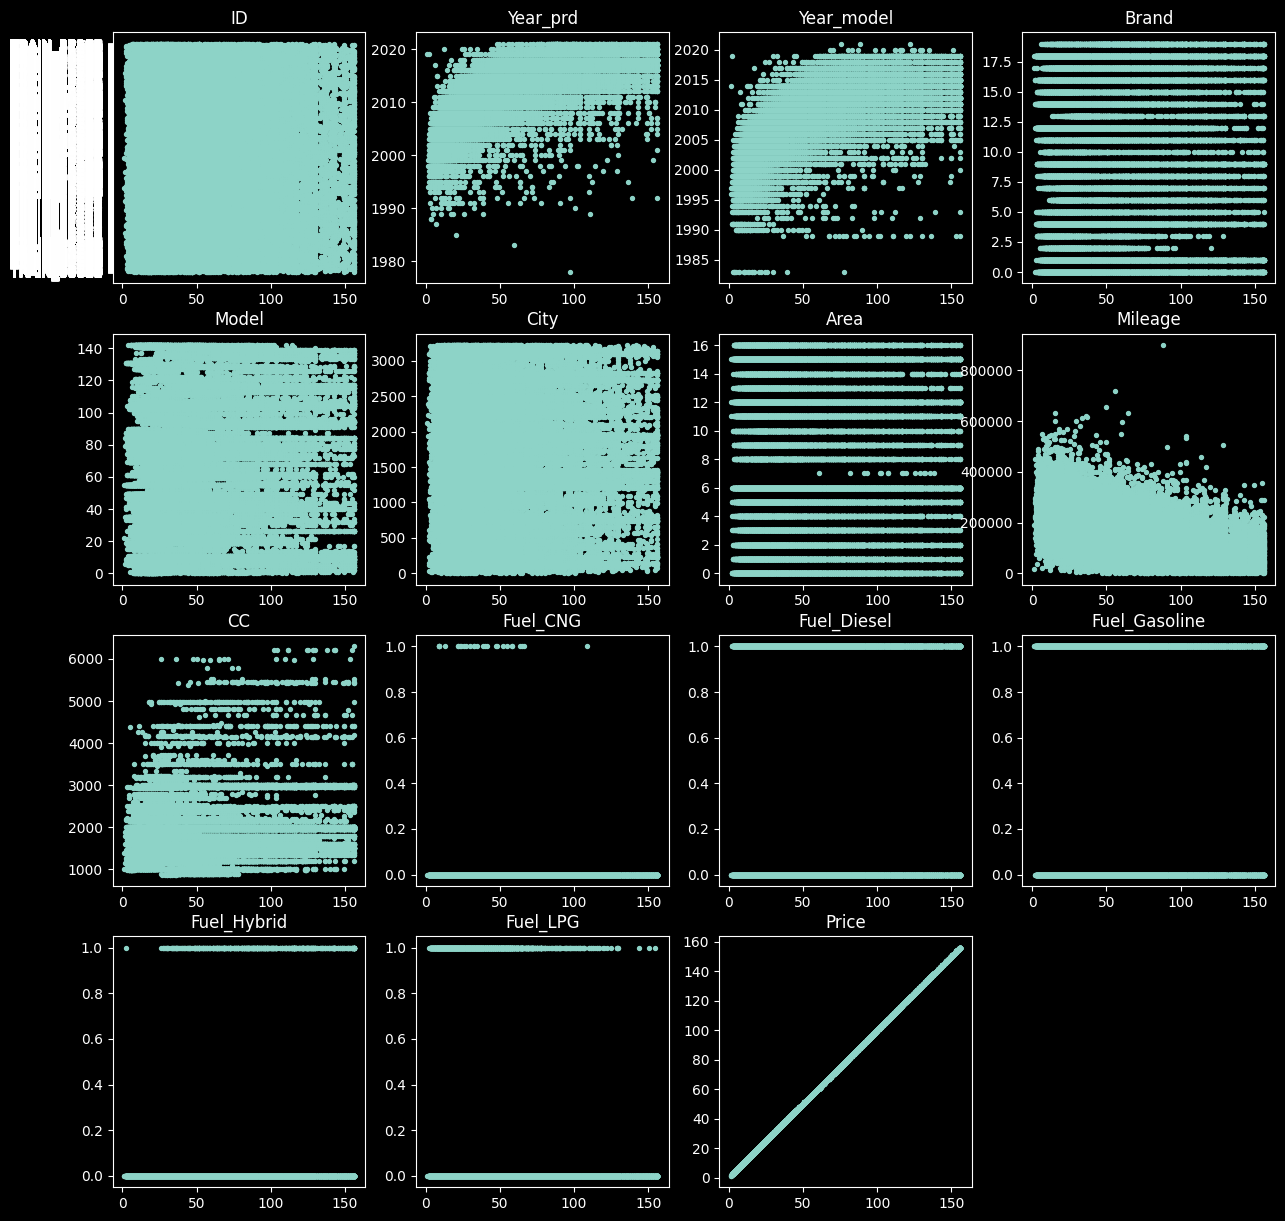

In [19]:
tmp = df.dtypes
valList=[]
findType=['int32','int64','float32','float64']
for index, val in zip(tmp.index, tmp.values):
    #if index in findType:
    valList.append(index)

print(valList)
#lenL = len(valList)

figure = plt.figure(figsize=(15,15))
for cnt, val in enumerate(valList):
    plt.subplot(4, 4, cnt+1)
    plt.scatter(df['Price'], df[val],s=8)
    plt.title(val)

#그림 파일 세이브
figure.savefig('scatter00.png')

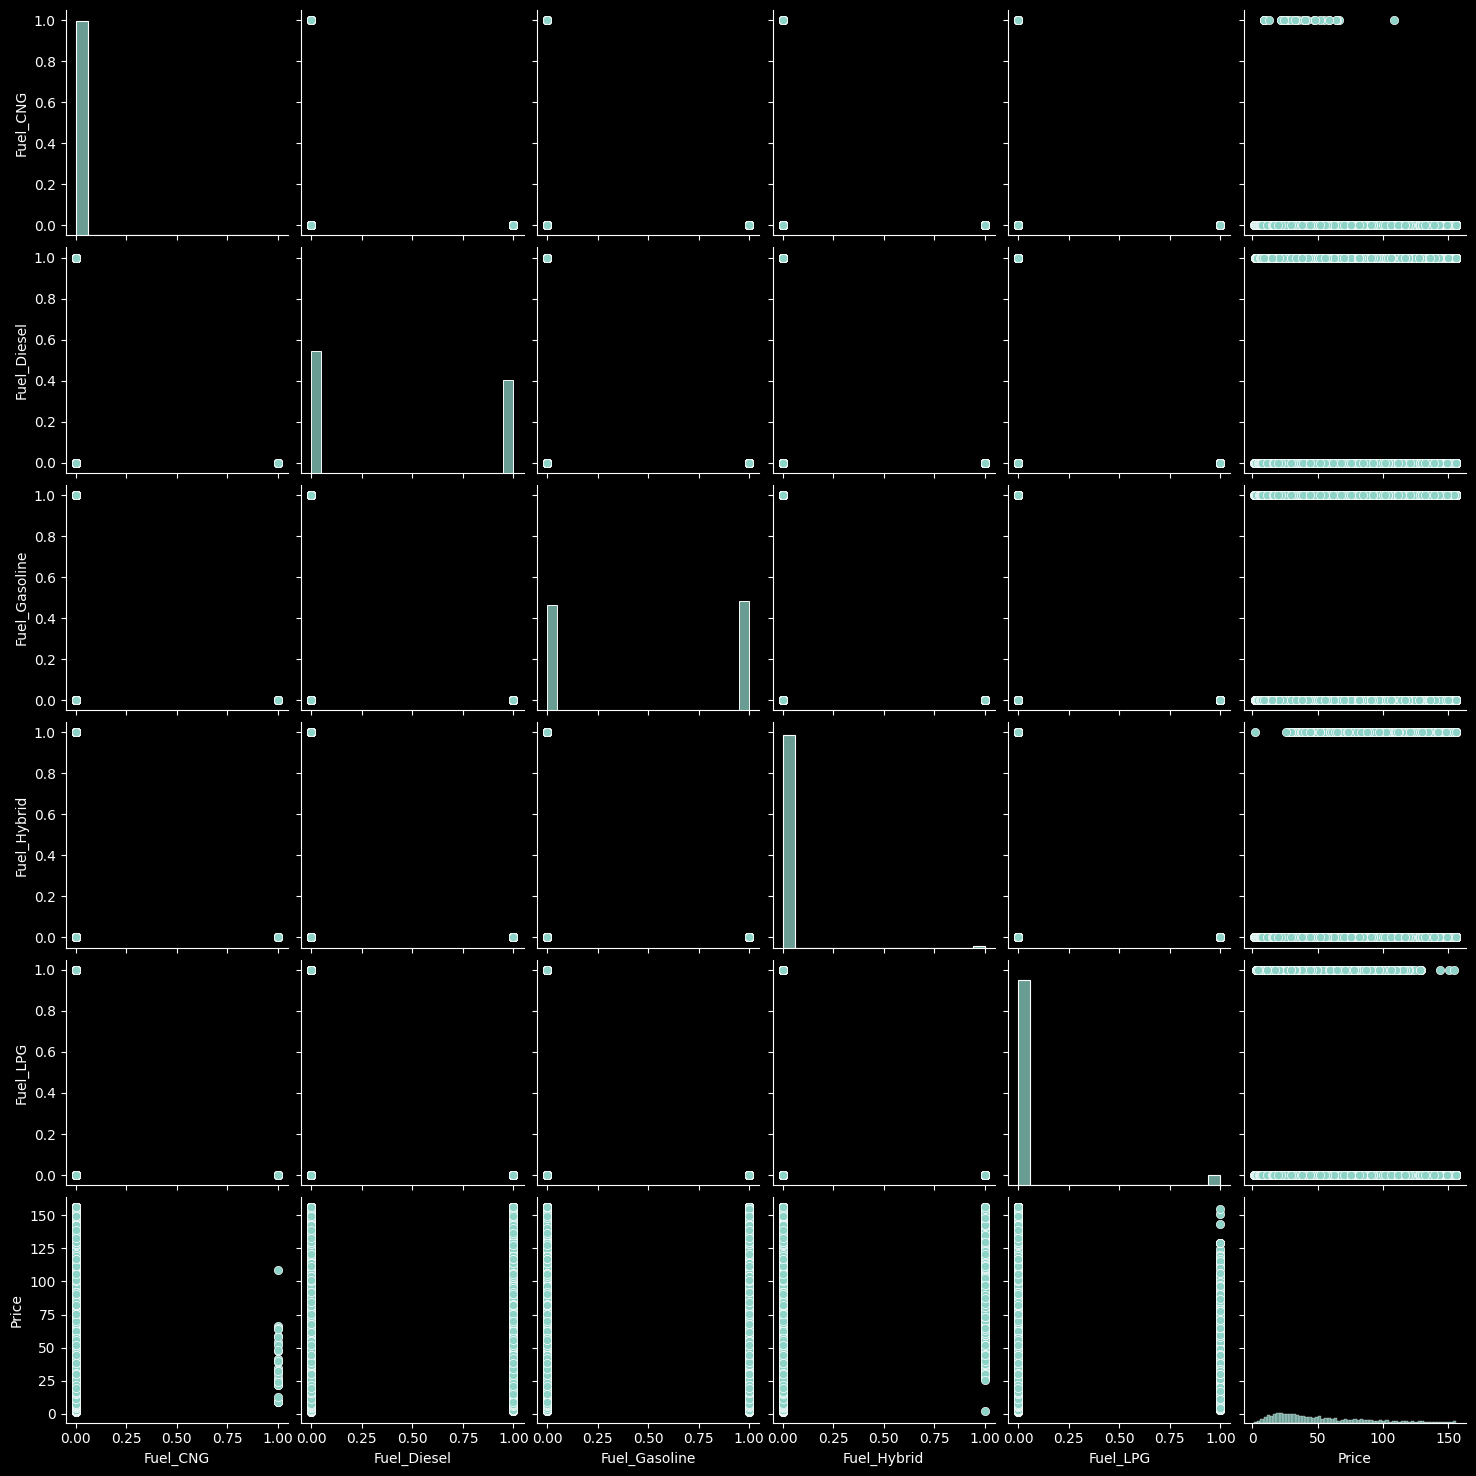

In [22]:
import seaborn as sns

sns.pairplot(df[['Fuel_CNG', 'Fuel_Diesel', 'Fuel_Gasoline','Fuel_Hybrid','Fuel_LPG','Price']]);

In [30]:
# 모델명 별 평균 가격 
tmp = pd.DataFrame(['Brand','Model','Price'])
tmp.groupby(['Brand','Model'], as_index=False).mean()

KeyError: 'Brand'

In [17]:
import pickle

## Save pickle
with open("data.pickle","wb") as fw:
    pickle.dump(df, fw)